In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import cufflinks as cf
cf.go_offline()
%matplotlib inline 


#Reading the data
import io
from google.colab import files

uploaded = files.upload()


Saving GalaxyZoo1_DR_table2.xlsx to GalaxyZoo1_DR_table2 (1).xlsx


# Understanding the dataset

In [29]:
zoo = pd.read_excel(io.BytesIO(uploaded['GalaxyZoo1_DR_table2.xlsx']))
zoo.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


The first column is a unique identifier which cannot be a feature for our model, and the second and third columns are the absolute positions of galaxies which do not correlate with our classes/targets, so we can remove them all:

In [30]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

check for class imbalance: 

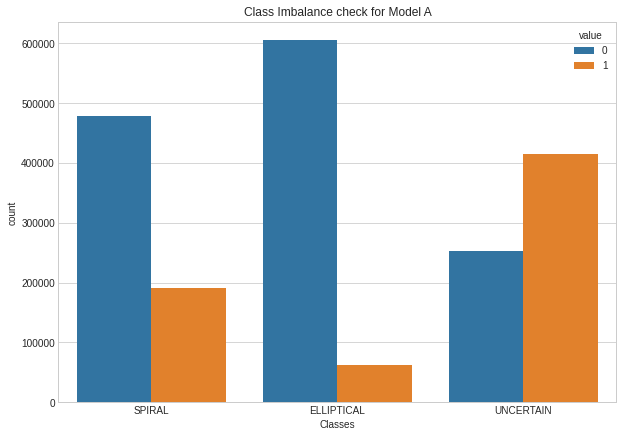

In [31]:
#plot the value_counts for three-class columns

plt.figure(figsize=(10,7))
plt.title('Class Imbalance check for Model A')
countplot = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplot))
plt.xlabel('Classes')
plt.show()

In [32]:
#Isolating the target from the features

X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values 
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values

#Spliting the data : 80% Training and 20% test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
df = pd.DataFrame(data[['SPIRAL','ELLIPTICAL','UNCERTAIN']])

counts = df.value_counts().sort_index()
print(counts)



SPIRAL  ELLIPTICAL  UNCERTAIN
0       0           1            415529
        1           0             62190
1       0           0            190225
dtype: int64


Building the base model: Sequential

In [6]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [34]:
#fit the data into our model

model.fit(x=X_train,y=y_train,epochs=20)

Epoch 1/20
16699/16699 [==============================] - 32s 2ms/step - loss: 0.2184 - accuracy: 0.8993
Epoch 2/20
16699/16699 [==============================] - 31s 2ms/step - loss: 0.2179 - accuracy: 0.8998
Epoch 3/20
16699/16699 [==============================] - 31s 2ms/step - loss: 0.2172 - accuracy: 0.9000
Epoch 4/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2164 - accuracy: 0.9000
Epoch 5/20
16699/16699 [==============================] - 31s 2ms/step - loss: 0.2154 - accuracy: 0.9005
Epoch 6/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2146 - accuracy: 0.9001
Epoch 7/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2140 - accuracy: 0.9003
Epoch 8/20
16699/16699 [==============================] - 31s 2ms/step - loss: 0.2136 - accuracy: 0.9008
Epoch 9/20
16699/16699 [==============================] - 30s 2ms/step - loss: 0.2133 - accuracy: 0.9008
Epoch 10/20
16699/16699 [==============================

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


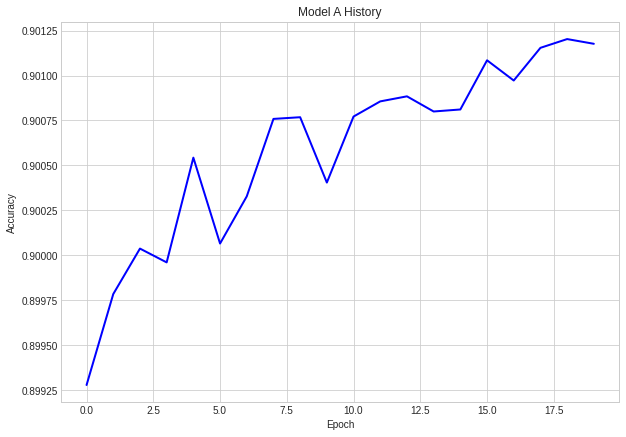

In [36]:
#To check if our model is properly learning (i.e. no fluctuations in the accuracy rate during training)

mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model A History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='blue',lw=2)

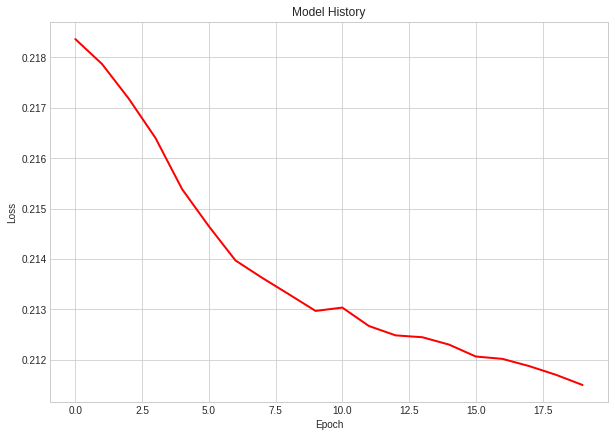

In [37]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(mod_history['loss'],color='red',lw=2)

In [38]:
#y_test = scaler.transform(y_test)

y_test

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [39]:
#confusion matrix as a performance measurement for machine learning classification.

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

y_pred

4175/4175 [==============================] - 6s 1ms/step


array([2, 2, 2, ..., 2, 0, 0])

In [40]:
print(len(y_pred))
print(len(y_test))

133589
133589


In [41]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test.argmax(axis=1),y_pred)
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     38281
           1       0.90      0.77      0.83     12554
           2       0.91      0.94      0.92     82754

    accuracy                           0.90    133589
   macro avg       0.90      0.86      0.88    133589
weighted avg       0.90      0.90      0.90    133589



Text(36.5, 0.5, 'True class')

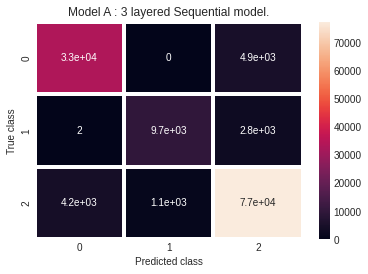

In [42]:
matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)
sns.heatmap(matrix, annot=True, linewidths=3)
plt.title('Model A : 3 layered Sequential model.')
plt.xlabel('Predicted class')
plt.ylabel('True class')

In [43]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.21052
Test Accuracy: 90.17%
